In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.1'

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### visualize

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


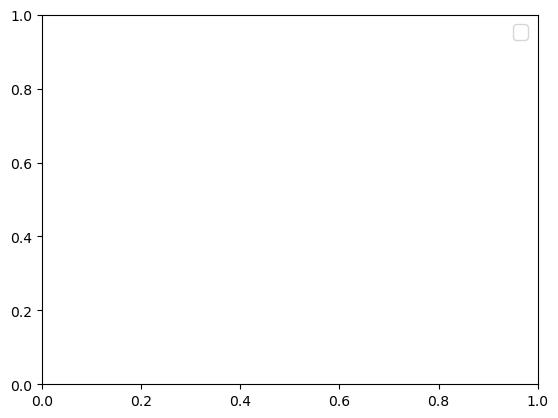

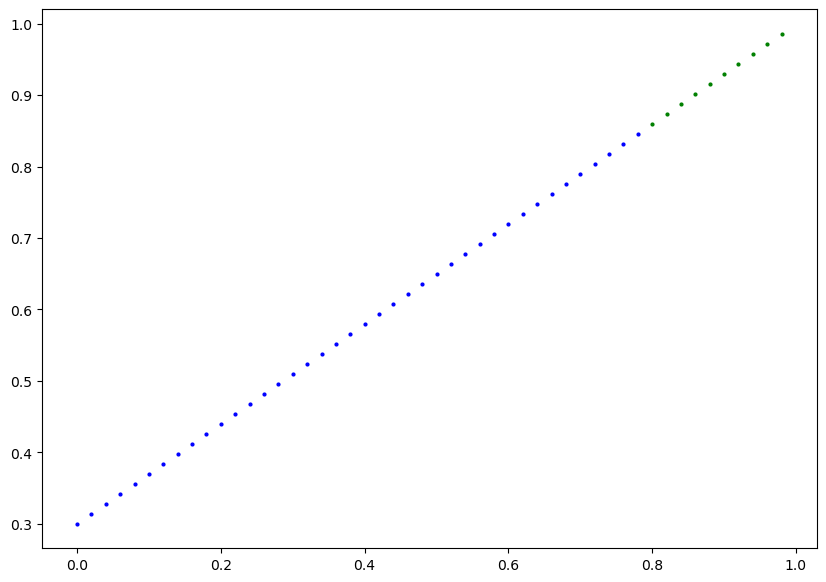

In [7]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

plt.legend(prop={"size":14})

plot_predictions()


## Build Model

In [12]:
# nn module is the base class for all neural nets

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # initialize model prameters
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

        # forward() defines the forward propagation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### PyTorch model building essentials
1) torch.nn
2) torch.nn.Parameter
3) torch.nn.Module (when subclassing it, u must overwrite with forward())
4) torch.optim
5) forward()

### checking the contents of our PyTorch model

In [13]:
torch.manual_seed(42) # gets same random value
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [14]:
# list named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

### Making prediction using torch.inference_mode()

In [15]:
with torch.inference_mode():
    y_pred = model_0(X_test)

y_pred

tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

1) Loss function: to calculate how much error is made
2) optimizer: takes the error and adjusts the model's parameters (weights and bias)


In [17]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

for PyTorch we need a training loop & a testing loop

### Loss Functions & Optimizers

In [18]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(),lr= 0.01)

# smaller change in learning rate, smaller change in parameters

## Building training loop in PyTorch

Things to be looped :

0) Loop through data
1) Forward Pass - data moving through forward() - [forward Propagation]
2) Calculate the loss
3) Optimizer zero grad
4) Loss backward - [back Propagation]
5) Optimizer step

In [19]:
epochs = 100

for epoch in range(epochs):

    model_0.train() # train mode in PyTorch sets all parameters that require gradients 

    model_0.eval() # turns off gradient tracking